In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

from pymcdm import visuals

from pyifdm import methods
from pyifdm.methods import ifs
from pyifdm import weights as ifs_weights
from pyifdm import correlations as corrs
from pyifdm.helpers import rank

np.set_printoptions(suppress=True, precision=3)

# Intuitionistic Fuzzy MCDA methods from PyIFDM

In [30]:
if_methods = {
    'IF-ARAS': methods.ifARAS(),
    'IF-CODAS': methods.ifCODAS(),
    'IF-COPRAS': methods.ifCOPRAS(),
    'IF-EDAS': methods.ifEDAS(),
    'IF-MABAC': methods.ifMABAC(),
    'IF-MAIRCA': methods.ifMAIRCA(),
    'IF-MOORA': methods.ifMOORA(),
    'IF-TOPSIS': methods.ifTOPSIS(),
    'IF-VIKOR': methods.ifVIKOR()
}

method_names = if_methods.keys()

# EXAMPLE 1

Buyukozkan, G., & Göçer, F. (2019, August). Prioritizing the strategies to enhance smart city logistics by intuitionistic fuzzy CODAS. In 11th Conference of the European Society for Fuzzy Logic and Technology (EUSFLAT 2019) (pp. 805-811). Atlantis Press.

In [31]:
matrix = np.array([
    [[0.234, 0.685], [1.0, 0], [0.188, 0.741], [
        0.201, 0.669], [0.085, 0.823], [0.26, 0.592]],
    [[0.18, 0.754], [0.241, 0.649], [0.097, 0.846],
        [1.0, 0], [0.15, 0.8], [1.0, 0]],
    [[0.254, 0.599], [0.197, 0.722], [0.187, 0.737], [
        0.131, 0.791], [0.26, 0.642], [0.256, 0.595]],
    [[0.26, 0.592], [0.304, 0.582], [0.142, 0.797], [
        0.04, 0.896], [0.171, 0.732], [0.142, 0.797]],
    [[0.085, 0.823], [0.26, 0.642], [0.171, 0.732],
        [1.0, 0], [1.0, 0], [0.04, 0.896]]
])

fuzzy_weights = np.array([[0.23, 0.709], [0.425, 0.418], [0.31, 0.546], [
                0.464, 0.355], [0.383, 0.493], [0.204, 0.732]])
types = np.array([1, -1, 1, -1, 1, 1])

In [32]:
results = []
for name, method in if_methods.items():
    if name == 'IF-VIKOR':
        results.append(rank(method(matrix, fuzzy_weights, types)[1], descending=False))
    else:
        results.append(rank(method(matrix, fuzzy_weights, types)))

In [33]:
print(tabulate(np.array(results).T, headers=list(if_methods.keys())))

  IF-ARAS    IF-CODAS    IF-COPRAS    IF-EDAS    IF-MABAC    IF-MAIRCA    IF-MOORA    IF-TOPSIS    IF-VIKOR
---------  ----------  -----------  ---------  ----------  -----------  ----------  -----------  ----------
        5           3            5          4           5            2           5            4           2
        1           2            3          5           3            1           4            5           1
        3           4            1          1           1            5           1            1           3
        4           5            2          2           2            4           2            2           4
        2           1            4          3           4            3           3            3           5


VISUALIZATION

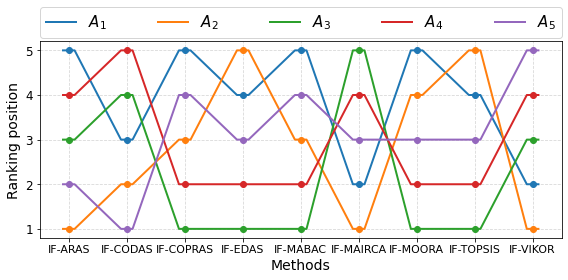

In [34]:
plt.rcParams['figure.figsize'] = (8, 4)
fig, ax = plt.subplots()

results = np.array(results)

spacer=0.2
high = int(np.ceil(np.max(results)))

plot_kwargs = dict(
    linewidth=2
)

for i in range(results.shape[1]):
    points = []
    markers = []
    for j in range(results.shape[0]):
        points.append((j - spacer/2, results[j, i]))
        points.append((j + spacer/2, results[j, i]))
        markers.append((j, results[j, i]))

    line, = ax.plot(*zip(*points), **plot_kwargs, label=f'$A_{{{i + 1}}}$')
    ax.plot(*zip(*markers), marker='o', c=line.get_color(), linestyle=' ')

ax.set_yticks(range(1, high + 1))
ax.set_yticklabels(range(1, high + 1), fontsize=12)
ax.set_ylabel('Ranking position', fontsize=14)

ax.set_xticks(range(results.shape[0]))
ax.set_xticklabels(method_names, fontsize=11)
ax.set_xlabel('Methods', fontsize=14)

ax.set_xlim([-0.5, results.shape[0] - 0.5])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
        ncol=5, mode="expand", borderaxespad=0., fontsize=15)

ax.grid(alpha=0.5, linestyle='--')

fig.tight_layout()
plt.savefig('example1.pdf', dpi=200)

CORRELATION

In [35]:
C = np.zeros((results.shape[0], results.shape[0]))
for i1, r1 in enumerate(results):
    for i2, r2 in enumerate(results):
        C[i1, i2] = np.round(corrs.ws_rank_similarity_coef(r1, r2), 2)

In [36]:
C

array([[1.  , 0.69, 0.42, 0.24, 0.42, 0.77, 0.38, 0.24, 0.73],
       [0.64, 1.  , 0.33, 0.35, 0.33, 0.58, 0.37, 0.35, 0.33],
       [0.42, 0.23, 1.  , 0.85, 1.  , 0.16, 0.92, 0.85, 0.41],
       [0.47, 0.21, 0.9 , 1.  , 0.9 , 0.26, 0.97, 1.  , 0.39],
       [0.42, 0.23, 1.  , 0.85, 1.  , 0.16, 0.92, 0.85, 0.41],
       [0.67, 0.64, 0.36, 0.26, 0.36, 1.  , 0.3 , 0.26, 0.86],
       [0.46, 0.19, 0.92, 0.97, 0.92, 0.25, 1.  , 0.97, 0.37],
       [0.47, 0.21, 0.9 , 1.  , 0.9 , 0.26, 0.97, 1.  , 0.39],
       [0.73, 0.68, 0.33, 0.15, 0.33, 0.86, 0.19, 0.15, 1.  ]])

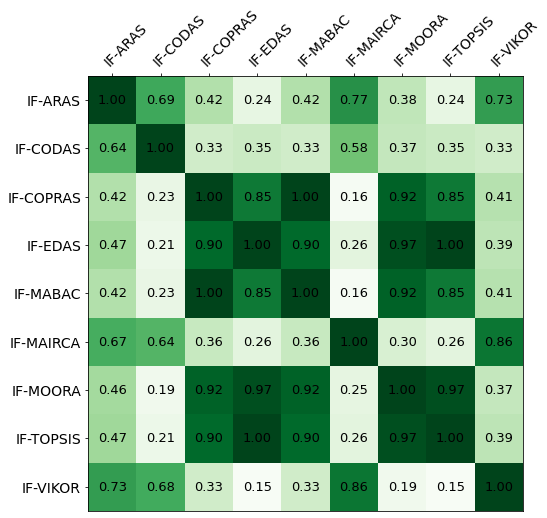

In [37]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = plt.subplots()

im = ax.imshow(C, cmap='Greens')
text_kwargs = dict(
    ha='center',
    va='center',
    color='k',
    fontsize=13
)
for i in range(len(method_names)):
    for j in range(len(method_names)):
        text = ax.text(j, i, '%0.2f' % C[i, j], **text_kwargs)

ax.tick_params(top=True, bottom=False,
                    labeltop=True, labelbottom=False)

plt.setp(ax.get_xticklabels(), rotation=45,
                 ha='left', rotation_mode='anchor')

ax.set_xticks(np.arange(len(method_names)), labels=method_names, fontsize=14)
ax.set_yticks(np.arange(len(method_names)), labels=method_names, fontsize=14)

plt.savefig('example1_corr.pdf', dpi=200)

# EXAMPLE 2

Liang, Y. (2020). An EDAS method for multiple attribute group decision-making under intuitionistic fuzzy environment and its application for evaluating green building energy-saving design projects. Symmetry, 12(3), 484.

ALL IF-MCDA METHODS

In [38]:
matrix = np.array([
    [[0.4745, 0.5255], [0.4752, 0.5248], [0.2981, 0.7019], [0.4374, 0.5627]],
    [[0.5346, 0.4654], [0.5532, 0.4468], [0.63, 0.37], [0.5901, 0.4099]],
    [[0.4324, 0.5676], [0.403, 0.597], [0.4298, 0.5702], [0.4361, 0.5639]],
    [[0.5235, 0.4765], [0.4808, 0.5192], [0.5667, 0.4333], [0.2913, 0.7087]],
    [[0.4168, 0.5832], [0.4923, 0.5077], [0.4732, 0.5268], [0.4477, 0.5523]]
])

crisp_weights = np.array([0.1410, 0.2263, 0.3234, 0.3093])
types = np.array([1, -1, 1, 1])

In [39]:
results = []
for name, method in if_methods.items():
    if name == 'IF-VIKOR':
        results.append(rank(method(matrix, crisp_weights, types)[1], descending=False))
    else:
        results.append(rank(method(matrix, crisp_weights, types)))

In [40]:
print(tabulate(np.array(results).T, headers=list(if_methods.keys())))

  IF-ARAS    IF-CODAS    IF-COPRAS    IF-EDAS    IF-MABAC    IF-MAIRCA    IF-MOORA    IF-TOPSIS    IF-VIKOR
---------  ----------  -----------  ---------  ----------  -----------  ----------  -----------  ----------
        5           4            1          5           5            1           5            5           5
        1           1            5          1           1            5           1            1           1
        2           5            4          3           3            4           4            3           3
        3           2            3          4           4            3           3            2           4
        4           3            2          2           2            2           2            4           2


VISUALIZATION

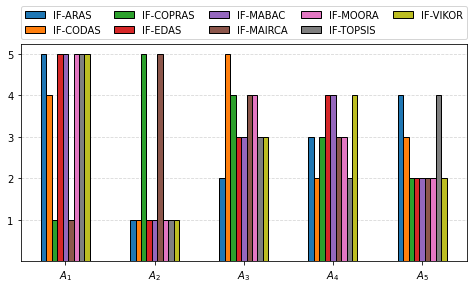

In [41]:
plt.rcParams['figure.figsize'] = (8, 4)
fig, ax = plt.subplots()

results = np.array(results)
visuals.ranking_bar(results, list(method_names))

plt.savefig('example2.pdf', dpi=200)

IF-EDAS METHOD WITH DIFFERENT NORMALIZATION / SCORE FUNCTIONS

Normalizations

In [42]:
edas_normalizations = {
    'Ecer': methods.ifEDAS(normalization=ifs.normalization.ecer_normalization),
    'Min-max': methods.ifEDAS(normalization=ifs.normalization.minmax_normalization),                                                                                          
    'Supriya': methods.ifEDAS(normalization=ifs.normalization.supriya_normalization),
    'Swap': methods.ifEDAS(normalization=ifs.normalization.swap_normalization),
}


In [43]:
results = {}
for name, function in edas_normalizations.items():
    results[name] = function(matrix, crisp_weights, types)

In [44]:
print(tabulate([[name, *rank(pref)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method      A1    A2    A3    A4    A5
--------  ----  ----  ----  ----  ----
Ecer         5     1     4     3     2
Min-max      5     1     2     3     4
Supriya      5     1     4     3     2
Swap         5     1     3     4     2


In [45]:
results = np.array([rank(r) for r in list(results.values())])


VISUALIZATION

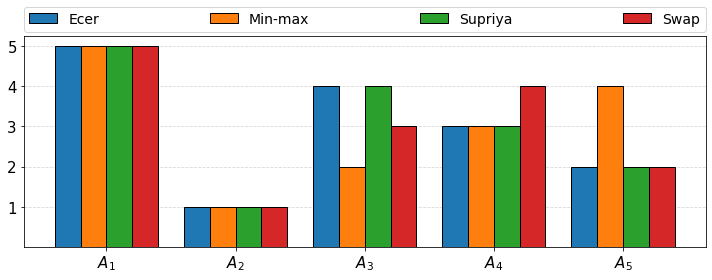

In [46]:
plt.rcParams['figure.figsize'] = (10, 4)
fig, ax = plt.subplots()

labels = list(edas_normalizations.keys())
results = np.array(results)

width = 1 / results.shape[0] - 0.1 / 2
pads = np.arange(- (results.shape[0] / 2 * width) + width/2,
        width * results.shape[0] / 2,
        width)

bar_kwargs = dict(
        linewidth=1,
        edgecolor='k'
)

x = np.arange(results.shape[1])
for i in range(results.shape[0]):
    ax.bar(x + pads[i], results[i], width, label=labels[i], **bar_kwargs)

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
        ncol=4, mode="expand", borderaxespad=0., fontsize=14)

ax.set_axisbelow(True)
ax.grid(alpha=0.5, linestyle='--', axis='y')

alts = [f'$A_{{{i + 1}}}$' for i in range(results.shape[1])]
ax.set_xticks(range(len(alts)), labels=alts, fontsize=15)

high = int(np.ceil(np.max(results)))
ax.set_yticks(range(1, high + 1))
ax.set_yticklabels(range(1, high + 1), fontsize=15)

fig.tight_layout()
plt.savefig('example2_edas_norm.pdf', dpi=200)

Score functions

In [47]:
edas_score = {
    'Chen 1': methods.ifEDAS(score=ifs.score.chen_score_1),                                                                                          
    'Chen 2': methods.ifEDAS(score=ifs.score.chen_score_2),                                                                                          
    'Kharal 1': methods.ifEDAS(score=ifs.score.kharal_score_1),                                                                                          
    'Kharal 2': methods.ifEDAS(score=ifs.score.kharal_score_2),                                                                                          
    'Liu Wang': methods.ifEDAS(score=ifs.score.liu_wang_score),                                                                                          
    'Supriya': methods.ifEDAS(score=ifs.score.supriya_score),                                                                                          
    'Thakur': methods.ifEDAS(score=ifs.score.thakur_score),                                                                                          
    'Wan Dong 1': methods.ifEDAS(score=ifs.score.wan_dong_score_1),                                                                                          
    'Wan Dong 2': methods.ifEDAS(score=ifs.score.wan_dong_score_2),                                                                                          
    'Wei': methods.ifEDAS(score=ifs.score.wei_score),                                                                                          
    'Zhang Xu 1': methods.ifEDAS(score=ifs.score.zhang_xu_score_1),                                                                                          
    'Zhang Xu 2': methods.ifEDAS(score=ifs.score.zhang_xu_score_2),
}

In [48]:
results = {}
for name, function in edas_score.items():
    results[name] = function(matrix, crisp_weights, types)

In [49]:
print(tabulate([[name, *rank(pref)] for name, pref in results.items()],
    headers=['Method'] + [f'A{i+1}' for i in range(matrix.shape[0])]))

Method        A1    A2    A3    A4    A5
----------  ----  ----  ----  ----  ----
Chen 1         1     5     2     4     3
Chen 2         5     1     3     4     2
Kharal 1       5     1     3     4     2
Kharal 2       1     4     5     3     2
Liu Wang       5     1     3     4     2
Supriya        5     1     3     4     2
Thakur         1     5     2     4     3
Wan Dong 1     5     1     3     4     2
Wan Dong 2     5     1     3     4     2
Wei            5     3     2     4     1
Zhang Xu 1     5     1     3     4     2
Zhang Xu 2     5     1     3     4     2


In [50]:
results = np.array([rank(r) for r in list(results.values())])

C = np.zeros((results.shape[0], results.shape[0]))
for i1, r1 in enumerate(results):
    for i2, r2 in enumerate(results):
        C[i1, i2] = np.round(corrs.ws_rank_similarity_coef(r1, r2), 2)

VISUALIZATION

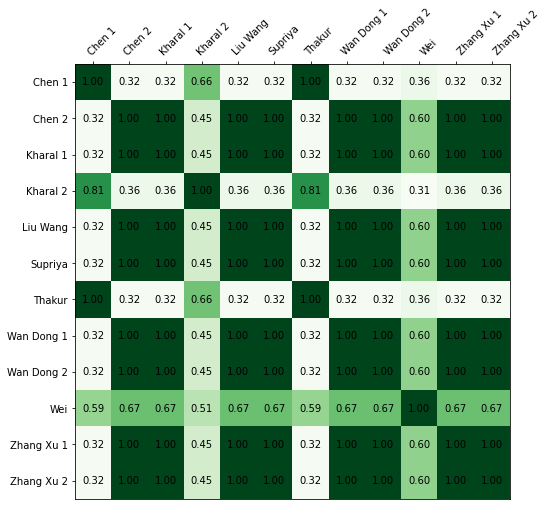

In [51]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = plt.subplots()

visuals.correlation_heatmap(C, list(edas_score.keys()), labeltop=True, ax=ax)

plt.savefig('example2_score.pdf', dpi=200)